In [125]:
import pandas as pd

In [126]:
df=pd.read_csv('similarity.csv')

In [127]:
df.rename(columns = {'Unnamed: 0':'S.No'}, inplace = True)

In [128]:
df['S.No']= df['S.No'] + 1

In [129]:
df

,S.No,Date,Technique,Morning-Midday,Midday-Evening,Morning-Evening
0,1,01/01/23,Cosine Similarity,73.351413,44.613236,34.173316
1,2,01/01/23,Semantic Similarity,96.062630,97.445554,95.561874
2,3,01/02/23,Cosine Similarity,57.157195,59.162945,42.400160
3,4,01/02/23,Semantic Similarity,98.220742,98.225093,98.085129
4,5,01/03/23,Cosine Similarity,73.402280,48.875538,48.308423
...,...,...,...,...,...,...
1019,1020,31/10/22,Semantic Similarity,99.828959,99.141967,99.205130
1020,1021,31/10/23,Cosine Similarity,86.921757,95.947510,85.745031
1021,1022,31/10/23,Semantic Similarity,99.000019,99.553859,99.041295
1022,1023,31/12/22,Cosine Similarity,14.287755,73.257643,22.974724


In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_heatmap(df, input_date, technique):

    filtered_df = df[(df['Date'] == input_date) & (df['Technique'] == technique)]

    if filtered_df.empty:
        print(f"No data found for {technique} on {input_date}. Please check your inputs.")
        return


    morning_midday = float(filtered_df['Morning-Midday'].iloc[0])
    morning_evening = float(filtered_df['Morning-Evening'].iloc[0])
    midday_evening = float(filtered_df['Midday-Evening'].iloc[0])

    # DataFrame for the heatmap
    heatmap_data = pd.DataFrame({
        'Morning': [100, morning_midday, morning_evening],
        'Midday': [morning_midday, 100, midday_evening],
        'Evening': [morning_evening, midday_evening, 100]
    })

    row_labels = ['Morning', 'Midday', 'Evening']

    # Plotting using seaborn heatmap
    # color_palette = sns.color_palette("Set3")
    sns.heatmap(heatmap_data, annot=True,  vmin=0, vmax=100, fmt='.2f',yticklabels=row_labels,cmap='viridis')
    plt.title(f'Similarity Heatmap for {technique} on {input_date}')
    plt.show()
    

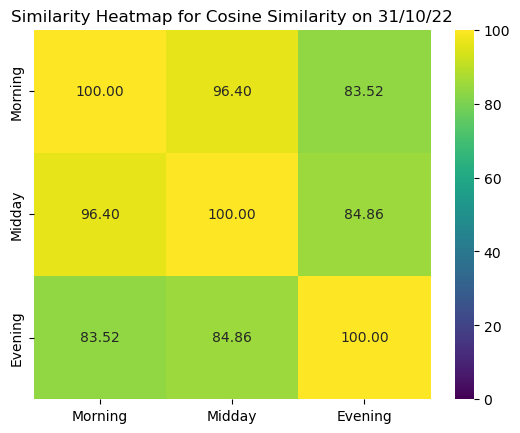

In [158]:
generate_heatmap(df, '31/10/22', 'Cosine Similarity')

In [132]:
# def graph():
#     while True:
#         input_date = input("Enter the date (e.g., '31/12/22') or 'exit' to quit: ")

#         if input_date.lower() == 'exit':
#             print("Exiting the program.")
#             break
#         technique = input("Enter the technique 'Cosine Similarity' or 'Semantic Similarity'): ")    
#         generate_heatmap(df, input_date, technique)

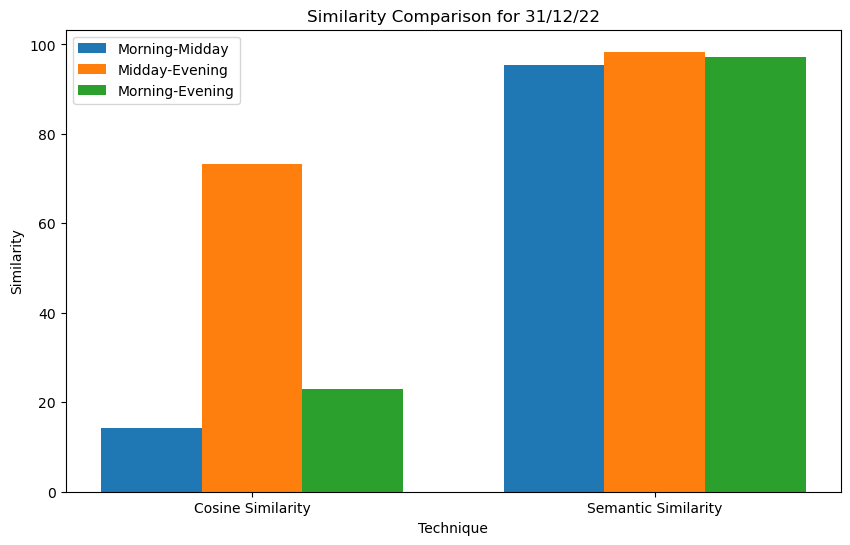

In [147]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# Choose a specific date
selected_date = '31/12/22'

# Filter DataFrame for the selected date
date_df = df[df['Date'] == selected_date]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25
indices = range(len(date_df))
plt.bar(indices, date_df['Morning-Midday'], width=bar_width, label='Morning-Midday')
plt.bar([i + bar_width for i in indices], date_df['Midday-Evening'], width=bar_width, label='Midday-Evening')
plt.bar([i + 2 * bar_width for i in indices], date_df['Morning-Evening'], width=bar_width, label='Morning-Evening')
plt.xlabel('Technique')
plt.ylabel('Similarity')
plt.title(f'Similarity Comparison for {selected_date}')
plt.xticks([i + bar_width for i in indices], date_df['Technique'])
plt.legend()
plt.show()


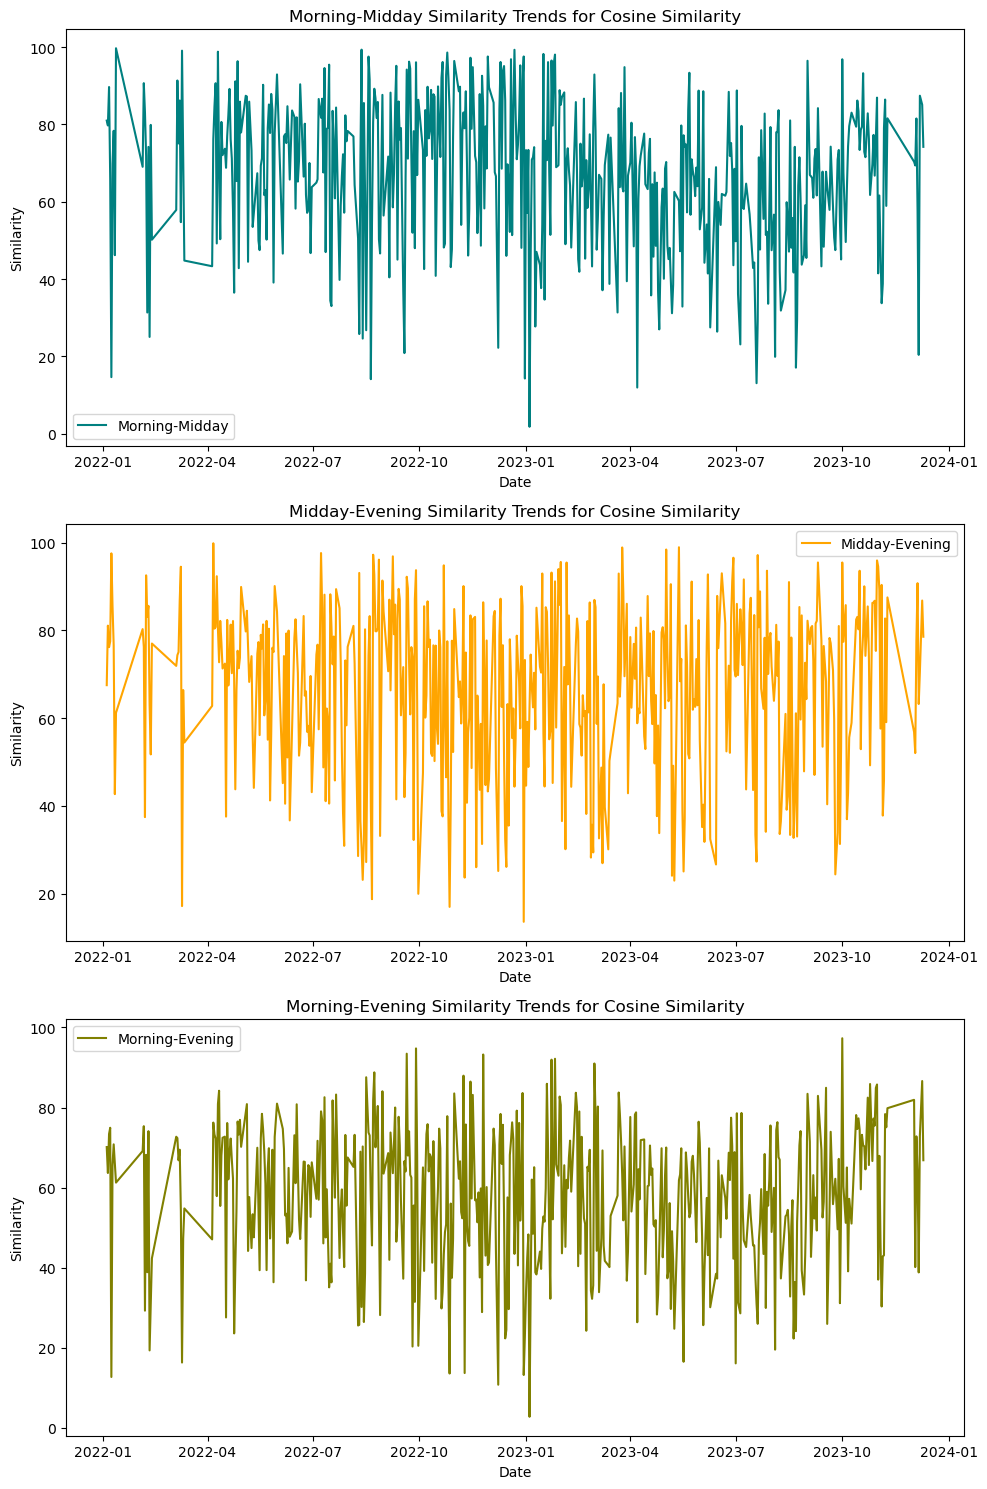

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

technique ='Cosine Similarity'

technique_df = df[df['Technique'] == technique].copy()  

if technique_df.empty:
    print(f"No data found for {technique}. Please check your inputs.")
else:
    technique_df['Date'] = pd.to_datetime(technique_df['Date'])

    technique_df = technique_df.sort_values('Date')

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    axes[0].plot(technique_df['Date'], technique_df['Morning-Midday'], label='Morning-Midday', color='teal')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Similarity')
    axes[0].set_title(f'Morning-Midday Similarity Trends for {technique}')
    axes[0].legend()

    axes[1].plot(technique_df['Date'], technique_df['Midday-Evening'], label='Midday-Evening', color='orange')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Similarity')
    axes[1].set_title(f'Midday-Evening Similarity Trends for {technique}')
    axes[1].legend()

    axes[2].plot(technique_df['Date'], technique_df['Morning-Evening'], label='Morning-Evening', color='olive')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Similarity')
    axes[2].set_title(f'Morning-Evening Similarity Trends for {technique}')
    axes[2].legend()

    plt.tight_layout()
    plt.show()


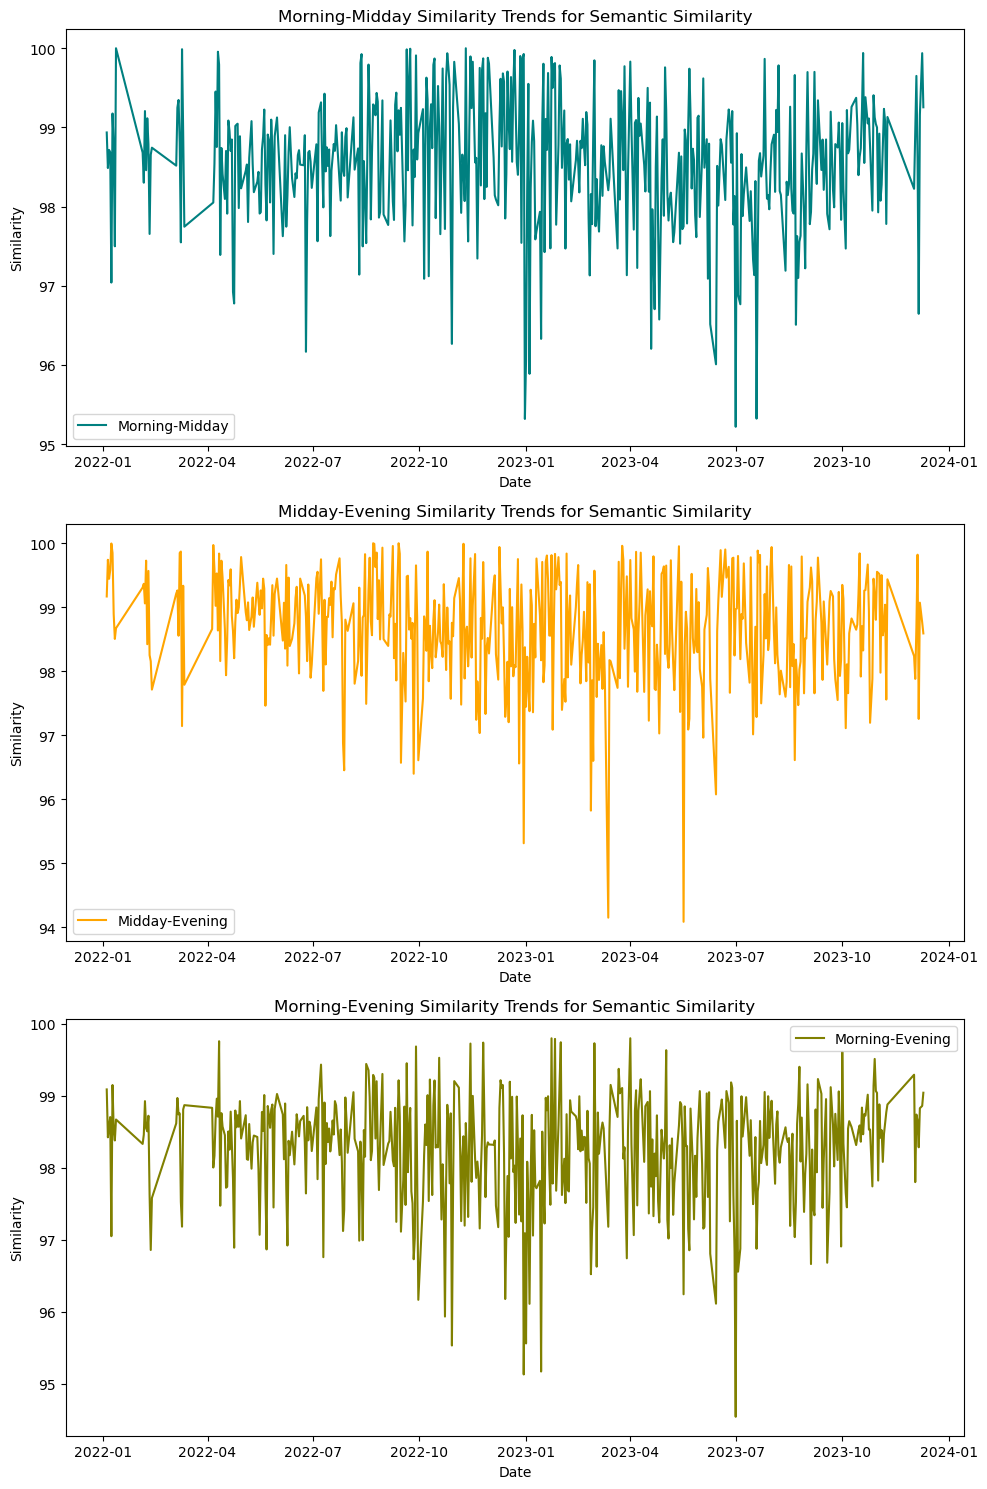

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

technique ='Semantic Similarity'

technique_df = df[df['Technique'] == technique].copy()  

if technique_df.empty:
    print(f"No data found for {technique}. Please check your inputs.")
else:
    technique_df['Date'] = pd.to_datetime(technique_df['Date'])

    technique_df = technique_df.sort_values('Date')

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    axes[0].plot(technique_df['Date'], technique_df['Morning-Midday'], label='Morning-Midday', color='teal')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Similarity')
    axes[0].set_title(f'Morning-Midday Similarity Trends for {technique}')
    axes[0].legend()

    axes[1].plot(technique_df['Date'], technique_df['Midday-Evening'], label='Midday-Evening', color='orange')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Similarity')
    axes[1].set_title(f'Midday-Evening Similarity Trends for {technique}')
    axes[1].legend()

    axes[2].plot(technique_df['Date'], technique_df['Morning-Evening'], label='Morning-Evening', color='olive')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Similarity')
    axes[2].set_title(f'Morning-Evening Similarity Trends for {technique}')
    axes[2].legend()

    plt.tight_layout()
    plt.show()
